<a href="https://colab.research.google.com/github/jonzli123/weblab-class/blob/master/MGH_Stratifying_By_Age_and_BMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
!pip install scikit-learn==0.24.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 19.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.
imbalanced-learn 0.10.1 requires scikit-learn>=1.0.2, but you have scikit-learn 0.24.2 which is incompatible.


In [41]:
! pip install imbalanced-learn==0.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [5]:
# set directory
from google.colab import drive 
drive.mount('/content/gdrive',force_remount=True)
working_directory = 'My Drive/MIT/Junior/SuperUROP/Colab/'
wd="/content/gdrive/"+working_directory
os.chdir(wd)
# load demographic data
questionnare = pd.read_excel("Baseline_Questionnaire_FINAL.xlsx")

Mounted at /content/gdrive


In [6]:
# change directory
working_directory = 'My Drive/MIT/Junior/SuperUROP/Colab/hr_stress_prediction_analysis/'
wd="/content/gdrive/"+working_directory
os.chdir(wd)
demographic = questionnare[['ID','Age_1','Sex','Height','Weight']].iloc[1:,:].astype('float64')
demographic.rename(columns={'ID':'user','Age_1':'Age'},inplace=True)
mgh = pd.read_csv('features with labels60s.csv')
mgh = pd.merge(mgh,demographic, on=['user','Age','Sex','Height','Weight'],how='left')
mgh['BMI'] = (mgh['Weight']/(mgh['Height']**2))*703
mgh['count'] = 1
mgh.head()

,timestamp,window,localtime,user,version,Survey_Start_Time,var,iqr,vlf,lf,...,mahalanobis,p value,outliers removed,Age,Sex,Height,Weight,sdnn,BMI,count
0,2017-03-16 20:17:02.258,"Row(start=datetime.datetime(2017, 3, 16, 20, 1...",2017-03-16 20:17:02.257999,1,1,2017-03-16 20:22:02,1209.913124,63.5,0.153547,0.583289,...,2.858492,0.239489,0,60.0,1.0,69.0,195.0,34.783805,28.793321,1
1,2017-03-16 20:18:00.627,"Row(start=datetime.datetime(2017, 3, 16, 20, 1...",2017-03-16 20:18:00.627000,1,1,2017-03-16 20:22:02,317.473580,25.0,0.151766,0.474071,...,0.982209,0.611950,0,60.0,1.0,69.0,195.0,17.817788,28.793321,1
2,2017-03-16 20:19:00.628,"Row(start=datetime.datetime(2017, 3, 16, 20, 1...",2017-03-16 20:19:00.628000,1,1,2017-03-16 20:22:02,275.022840,26.5,0.247085,0.606629,...,4.682277,0.096218,0,60.0,1.0,69.0,195.0,16.583813,28.793321,1
3,2017-03-16 20:20:00.451,"Row(start=datetime.datetime(2017, 3, 16, 20, 2...",2017-03-16 20:20:00.450999,1,1,2017-03-16 20:22:02,285.810543,28.0,0.020594,0.271829,...,1.048826,0.591903,0,60.0,1.0,69.0,195.0,16.905932,28.793321,1
4,2017-03-16 20:21:00.199,"Row(start=datetime.datetime(2017, 3, 16, 20, 2...",2017-03-16 20:21:00.198999,1,1,2017-03-16 20:22:02,469.970141,38.5,0.159325,0.422931,...,1.110613,0.573896,0,60.0,1.0,69.0,195.0,21.678795,28.793321,1


# Stratify by Age and BMI

In [7]:
mgh_demographic = mgh.groupby('user')['Age','BMI'].mean()
mgh_demographic['count'] = 1
mgh_demographic.head()

<ipython-input-7-1c71822f4923>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mgh_demographic = mgh.groupby('user')['Age','BMI'].mean()


,Age,BMI,count
user,,,
1,60.0,28.793321,1
2,43.0,20.798817,1
3,45.0,25.101869,1
4,38.0,24.117175,1
5,43.0,43.231502,1


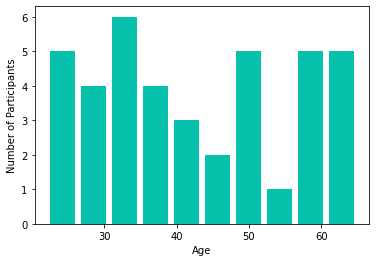

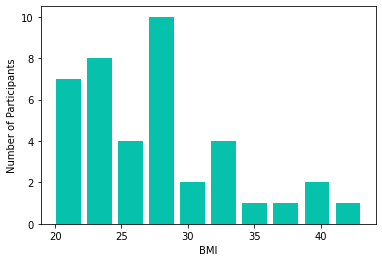

In [8]:
for col in ['Age','BMI']:
  fig, ax = plt.subplots()
  ax.hist(mgh_demographic[col],rwidth=0.8, color = "#06c2ac", lw=0)
  ax.set_ylabel('Number of Participants')
  ax.set_xlabel(col)


In [9]:
def filter_by_age_and_BMI(df):
    # filter by age
    age_cond = [
                df['Age'] < 42.5,
                df['Age'] > 42.5,
    ]
    age_group = ['Ages 22-42', 'Ages 43-65']

    df['Age Group'] = pd.DataFrame(np.select(age_cond,age_group,np.NaN))

    # filter by BMI
    BMI_cond = [
                df['BMI'] < 25,
                (df['BMI'] >= 25) & (df['BMI'] < 30),
                df['BMI'] >= 30,
    ]
    BMI_group = ['Normal','Overweight','Obese']

    df['BMI Group'] = pd.DataFrame(np.select(BMI_cond,BMI_group,np.NaN))
    
    for key, val in zip(['Age Group', 'BMI Group'], [age_group, BMI_group]):
      df_ = df[df[key].isin(val)]
      print(df_.groupby(key)['count'].sum())

In [10]:
for df in [mgh, mgh_demographic]:
  filter_by_age_and_BMI(df)


Age Group
Ages 22-42    644
Ages 43-65    726
Name: count, dtype: int64
BMI Group
Normal        546
Obese         426
Overweight    398
Name: count, dtype: int64
Age Group
Ages 22-42    17
Ages 43-65    19
Name: count, dtype: int64
BMI Group
Normal        16
Obese         10
Overweight    10
Name: count, dtype: int64


# Clustering Analysis

In [11]:
from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice  
import warnings

def comparing_maniford_methods(X,color,n_neighbors,n_components,suptitle=None,ticklabels=None):

    # make a color map of fixed colors
    classes = len(np.unique(color)) 
    bounds= [-0.5]+list(np.unique(color)+0.5)
    colors_ = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                          '#f781bf', '#a65628', '#984ea3',
                                          '#999999', '#e41a1c', '#dede00']),
                                  int(max(color) + 1))))
    cmap = colors.ListedColormap(colors_)
    norm = colors.BoundaryNorm(bounds, len(np.unique(color)))
    
    # Create figure
    fig = plt.figure(figsize=(15, 8))
    fig.suptitle("Manifold Learning with %i components, %i neighbors"
                % (n_components, n_neighbors), fontsize=14)

    # Set-up manifold methods
    LLE = partial(manifold.LocallyLinearEmbedding,
                  n_neighbors, n_components, eigen_solver='auto')

    methods = OrderedDict()
    methods['LLE'] = LLE(method='standard', random_state=7)
    methods['LTSA'] = LLE(method='ltsa',random_state=7)
    methods['Hessian LLE'] = LLE(method='hessian',random_state=7)
    methods['Modified LLE'] = LLE(method='modified',random_state=7)
    methods['Isomap'] = manifold.Isomap(n_neighbors, n_components)
    methods['MDS'] = manifold.MDS(n_components, random_state=7)
    methods['SE'] = manifold.SpectralEmbedding(n_components=n_components, n_neighbors=n_neighbors, random_state=42)
    methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca', random_state=7)
    
    # Plot results
    result = {}
    for i, (label, method) in enumerate(methods.items()):
        try:
          t0 = time()
          Y = method.fit_transform(X)
          t1 = time()
          print("%s: %.2g sec" % (label, t1 - t0))
          ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
          scatter = ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=cmap, s=10)
          ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
          ax.xaxis.set_major_formatter(NullFormatter())
          ax.yaxis.set_major_formatter(NullFormatter())
          ax.axis('tight')
          result[label] = Y
        except:
          ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
          scatter = ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=cmap, s=10)
          ax.set_title("%s - ERROR" % label)
          ax.xaxis.set_major_formatter(NullFormatter())
          ax.yaxis.set_major_formatter(NullFormatter())
          ax.axis('tight')

    ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
    cbar = plt.colorbar(scatter, cax=ax2, cmap=cmap, norm=norm, boundaries=bounds, ticks=np.unique(color), spacing='uniform', label='Class')
    if ticklabels is not None:
      cbar.set_ticklabels(ticklabels)
    plt.suptitle(suptitle)
    plt.show()

    return result

In [12]:
from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice  
import warnings

def tsne(X, Y, title='', ticklabels=None):
  bounds= [-0.5]+list(np.unique(Y)+0.5)
  colors_ = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                        '#f781bf', '#a65628', '#984ea3',
                                        '#999999', '#e41a1c', '#dede00']),
                                int(max(Y) + 1))))
  cmap = colors.ListedColormap(colors_)
  norm = colors.BoundaryNorm(bounds, len(np.unique(Y)))
  tsne_ = manifold.TSNE(n_components=2, init='pca', random_state=7)
  X_ = tsne_.fit_transform(X)
  fig, ax = plt.subplots()
  scatter = ax.scatter(X_[:, 0], X_[:, 1], c=Y, cmap=cmap, s=10)
  ax.set_title(title)
  ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
  cbar = plt.colorbar(scatter, cax=ax2, cmap=cmap, norm=norm, boundaries=bounds, ticks=np.unique(Y), spacing='uniform', label='Class')
  if ticklabels is not None:
      cbar.set_ticklabels(ticklabels)
  return X_

In [13]:
def plot_clustering_results(X,Y,params,suptitle=None, ticklabels=None, returnFig=False):

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        gamma=params['gamma'], random_state=7, affinity=params['affinity'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('Spectral\nClustering', spectral),
        ('Ward', ward),
        # ('Agglomerative\nClustering', average_linkage),
        # ('OPTICS', optics),
        ('BIRCH', birch),
        ('Gaussian\nMixture', gmm)
    )
    fig = plt.figure(figsize=(9 * 2 + 3, 6))
    plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.95, wspace=.05,
                    hspace=.01)
    
    plt.subplot(1, len(clustering_algorithms)+1, 1)
    plt.title('Ground\nTruth', size=18)
    classes = len(np.unique(Y)) 
    bounds= [-0.5]+list(np.unique(Y)+0.5)
    colors_ = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                          '#f781bf', '#a65628', '#984ea3',
                                          '#999999', '#e41a1c', '#dede00']),
                                  int(max(Y) + 1))))
    cmap = colors.ListedColormap(colors_)
    norm = colors.BoundaryNorm(bounds, len(np.unique(Y)))
    # add black color for outliers (if any)
    scatter = plt.scatter(X[:, 0], X[:, 1], s=10, cmap=cmap, c=Y)
    plt.xticks(())
    plt.yticks(())
    plot_num = 2
    for name, algorithm in clustering_algorithms:
        algorithm.fit(X)
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        # make sure coloring matches that of the original
        if np.sum(y_pred==Y) < len(Y)/2:
          y_pred = 1 - y_pred
        plt.subplot(1, len(clustering_algorithms)+1, plot_num)
        plt.title(name, size=18)

        plt.scatter(X[:, 0], X[:, 1], s=10, cmap=cmap,c=y_pred)
        plt.xticks(())
        plt.yticks(())
        
        # clustering performance metrics
        rand_index = metrics.rand_score(Y, y_pred)
        adj_rand_index = metrics.adjusted_rand_score(Y, y_pred)
        nmi = metrics.normalized_mutual_info_score(Y, y_pred)  
        plt.text(.99, .09, f'Rand Index = {rand_index: _.2f}',
                 transform=plt.gca().transAxes, size=10,
                 horizontalalignment='right')
        plt.text(.99, .05, f'Adj. Rand Index = {adj_rand_index: _.2f}',
                 transform=plt.gca().transAxes, size=10,
                 horizontalalignment='right')
        plt.text(.99, .01, f'Normalized Mutual Info Score = {nmi: _.2f}',
                 transform=plt.gca().transAxes, size=10,
                 horizontalalignment='right')
        
        plot_num += 1

    # final plot formatting
    plt.suptitle(suptitle, fontsize=20)
    ax2 = fig.add_axes([0.95, 0.1, 0.02, 0.8])
    cbar = plt.colorbar(scatter, cax=ax2, cmap=cmap, norm=norm, boundaries=bounds, ticks=np.unique(Y), spacing='uniform', label='Class')
    if ticklabels is not None:
        cbar.set_ticklabels(ticklabels)
    plt.tight_layout(rect=[0,0,0.93,0.9])
    plt.show()

    if returnFig:
      return fig

In [14]:
def find_nearest(array, value):
      idx = np.argmin(np.linalg.norm(array - value, axis=1))
      return array[idx,:], idx

def projection_on_line(p1, p2, p3):
    #distance between p1 and p2
    l2 = np.sum((p1-p2)**2)
    if l2 == 0:
      print('p1 and p2 are the same points')

    #The line extending the segment is parameterized as p1 + t (p2 - p1).
    #The projection falls where t = [(p3-p1) . (p2-p1)] / |p2-p1|^2

    #if you need the point to project on line extention connecting p1 and p2
    t = np.sum((p3 - p1) * (p2 - p1)) / l2

    projection = p1 + t * (p2 - p1)
    return projection

def find_centroids_(X_original, X, Y, method, params, features):
    # clustering
    if method is not None:
      # available methods
      methods = {}
      # connectivity matrix for structured Ward
      connectivity = kneighbors_graph(
          X, n_neighbors=params['n_neighbors'], include_self=False)
      # make connectivity symmetric
      connectivity = 0.5 * (connectivity + connectivity.T)
      methods['ward'] = cluster.AgglomerativeClustering(
          n_clusters=params['n_clusters'], linkage='ward',
          connectivity=connectivity)
      methods['spectral'] = cluster.SpectralClustering(
          n_clusters=params['n_clusters'], eigen_solver='arpack',
          gamma=params['gamma'], random_state=7, affinity=params['affinity'])
      methods['birch'] = cluster.Birch(n_clusters=params['n_clusters'])
      methods['gmm'] = mixture.GaussianMixture(
          n_components=params['n_clusters'], covariance_type='full')
      
      methods[method].fit(X)
      if hasattr(methods[method], 'labels_'):
          labels = methods[method].labels_.astype(int)
      else:
          labels = methods[method].predict(X)
    else:
      labels = Y

    # find centroids
    true_centroids = []
    for label in np.unique(labels):
      true_centroids.append(np.nanmean(np.where(np.array([labels]).T==label,X,np.nan),axis=0))
    true_centroids = np.array(true_centroids)

    # find data points closets to the centroids
    centroids = []
    indices = []
    for centroid in true_centroids:
      centroids.append(find_nearest(X,centroid)[0])
      indices.append(find_nearest(X,centroid)[1])
    centroids = np.array(centroids)

    # get projection of every point on the line between the centroids
    projection = []
    for i in range(len(X)):
      proj = projection_on_line(centroids[0,:], centroids[1,:], X[i,:])
      projection.append(proj)
    projection = np.array(projection)
    
    # set up color map
    classes = len(np.unique(Y)) 
    bounds= [-0.5]+list(np.unique(Y)+0.5)
    colors_ = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                          '#f781bf', '#a65628', '#984ea3',
                                          '#999999', '#e41a1c', '#dede00']),
                                  int(max(Y) + 1))))
    cmap = colors.ListedColormap(colors_)
    norm = colors.BoundaryNorm(bounds, len(np.unique(Y)))


    # scatter plots 
    if method is not None:
      fig, ax = plt.subplots(ncols=2, figsize=(15,5))
      ax[0].scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k')
      ax[0].scatter(centroids[:,0], centroids[:,1], c='black',marker='X', s=300)
      ax[0].set_title('Colored by Ground Truth', fontsize=18)
      ax[1].scatter(X[:,0], X[:,1], c=labels, cmap=cmap, edgecolors='k')
      ax[1].scatter(centroids[:,0], centroids[:,1], c='black',marker='X', s=300)
      ax[1].set_title('Colored by Predicted Labels', fontsize=18)
      fig.show()

      fig,ax = plt.subplots(figsize=(30,6),nrows=2)
      ax[0].scatter(projection[:,0], np.zeros(len(projection)),c=Y, cmap=cmap)
      ax[0].scatter(centroids[:,0], np.zeros(2),marker='X', s=300, c='black')
      ax[0].set_title('Projection onto the Line Connecting the Centroids, Colored by Ground Truth', fontsize=18, loc='left')
      ax[0].set_yticks(())
      ax[1].scatter(projection[:,0], np.zeros(len(projection)),c=labels, cmap=cmap)
      ax[1].scatter(centroids[:,0], np.zeros(2),marker='X', s=300, c='black')
      ax[1].set_title('Projection onto the Line Connecting the Centroids, Colored by Predicted Label', fontsize=18, loc='left')
      ax[1].set_yticks(())
      fig.tight_layout()
    else:
      fig, ax = plt.subplots(figsize=(8,5))
      scatter = ax.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k')
      ax.scatter(centroids[:,0], centroids[:,1], c='black',marker='X', s=300)
      ax.set_title('t-SNE', fontsize=18)
      ax_cb = fig.add_axes([0.95, 0.1, 0.02, 0.8])
      cbar = plt.colorbar(scatter, cax=ax_cb, cmap=cmap, norm=norm, boundaries=bounds, ticks=np.unique(Y), spacing='uniform', label='Class')
      cbar.set_ticklabels(['low stress', 'high stress'])
      fig.show()
      fig.show()

      fig,ax = plt.subplots(figsize=(15,6))
      ax.scatter(projection[:,0], np.zeros(len(projection)),c=Y, cmap=cmap,edgecolors='k')
      ax.scatter(centroids[:,0], np.zeros(2),marker='X', s=300, c='black')
      ax.set_title('Projection onto the Line Connecting the Centroids', fontsize=18, loc='left')
      ax.set_yticks(())

    # equation of the line connecting the centroids
    line_bet_centroids = pd.DataFrame()
    line_bet_centroids['features'] = features
    line_bet_centroids['coeff'] = X_original[indices[0],:] - X_original[indices[1],:]
    line_bet_centroids['abs coeff'] = np.abs(line_bet_centroids['coeff'])
    line_bet_centroids['norm. abs coeff'] = (line_bet_centroids['abs coeff'] - np.mean(line_bet_centroids['abs coeff']))/np.std(line_bet_centroids['abs coeff'])
    line_bet_centroids.sort_values('abs coeff', ascending=False, inplace=True)
    return line_bet_centroids

# Create evenly distributed sample

In [15]:
condtions = [
             mgh['window_label'].isin([0,1]),
             mgh['window_label'] >= 5,
]
outputs = ['low stress', 'high stress']
mgh['Stress Class'] = pd.DataFrame(np.select(condtions,outputs,np.NaN))
mgh_filtered_ = mgh[mgh['Stress Class'].isin(outputs)]
print(mgh_filtered_.groupby(['Age Group', 'Stress Class'])['count'].sum())
print()
print(mgh_filtered_.groupby(['BMI Group', 'Stress Class'])['count'].sum())
print()
print(mgh_filtered_.groupby(['Age Group','BMI Group', 'Stress Class'])['count'].sum())

Age Group   Stress Class
Ages 22-42  high stress     332
            low stress       91
Ages 43-65  high stress     116
            low stress      341
Name: count, dtype: int64

BMI Group   Stress Class
Normal      high stress     202
            low stress      137
Obese       high stress      51
            low stress      217
Overweight  high stress     195
            low stress       78
Name: count, dtype: int64

Age Group   BMI Group   Stress Class
Ages 22-42  Normal      high stress     186
                        low stress       53
            Obese       high stress      21
                        low stress       10
            Overweight  high stress     125
                        low stress       28
Ages 43-65  Normal      high stress      16
                        low stress       84
            Obese       high stress      30
                        low stress      207
            Overweight  high stress      70
                        low stress       50
Name: count

In [16]:
user_stress_dist = pd.DataFrame(mgh_filtered_.groupby(['user','Stress Class'])['count'].sum())
user_stress_dist = user_stress_dist.stack().reset_index().drop('level_2', axis=1)
print(len(user_stress_dist.drop_duplicates(subset='user')))
count = {}
user_one_class = user_stress_dist.drop_duplicates(subset='user',keep=False)
user_high_stress = user_one_class[user_stress_dist['Stress Class']=='high stress']
count['high stress only'] = len(user_high_stress)
user_low_stress = user_one_class[user_stress_dist['Stress Class']=='low stress']
count['low stress only'] = len(user_low_stress)
user_both_class = user_stress_dist[user_stress_dist.duplicated(subset='user', keep=False)]
count['both'] = len(user_both_class)/2
count

40


<ipython-input-16-a4ebef2a1549>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_high_stress = user_one_class[user_stress_dist['Stress Class']=='high stress']
<ipython-input-16-a4ebef2a1549>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_low_stress = user_one_class[user_stress_dist['Stress Class']=='low stress']


{'high stress only': 18, 'low stress only': 10, 'both': 12.0}

In [17]:
mgh_filtered_['sdnn'] = np.sqrt(mgh_filtered_['var'])
mgh_filtered = mgh_filtered_[['hf', 'sdnn', 'mean', '80th', '20th','Age', 'Sex', 'BMI', 'Age Group', 'BMI Group', 'Stress Class']]

<ipython-input-17-69cef2964fcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mgh_filtered_['sdnn'] = np.sqrt(mgh_filtered_['var'])


In [18]:
def normalize_features(data, features, var):
  """
  Computes normalized features and ground truth (labels)

  Parameter:
  * data (DataFrame)
  * features (list(str)): each element in the list is a column name in the DataFrame
  * labels_col (str): name of the labels columns
  * var
  """
  X = pd.DataFrame()
  for f in features:
    if var == 'mean':
        X[f] = (data[f] - data[f].mean())/np.sqrt(np.var(data[f]))
    else:
        X[f] = (data[f] - data[f].median())/np.sqrt(np.var(data[f]))
  return X

In [19]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 
def rebalance(X,y):
    rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
    sm = SMOTE(random_state=42)

    if max(y.value_counts(normalize=True)) > 0.67:
      X_rus, y_rus = rus.fit_resample(X, y)
      X_sm, y_sm = sm.fit_resample(X_rus, y_rus)
    else:
      X_sm, y_sm = sm.fit_resample(X, y)

    print('Distribution of positive and negative classes before balancing (%):')
    print(y.value_counts())

    print('\nBalance of positive and negative classes (%):')
    print(y_sm.value_counts())
    print('\n\n')

    return X_sm, y_sm

# Age

In [20]:
young = mgh_filtered[mgh_filtered['Age Group']=='Ages 22-42'].drop(['Age Group','BMI Group'], axis=1)
old = mgh_filtered[mgh_filtered['Age Group']=='Ages 43-65'].drop(['Age Group','BMI Group'], axis=1)

In [21]:
X_young_bal, y_young_bal = rebalance(young.iloc[:,:-1], young.iloc[:,-1])

Distribution of positive and negative classes before balancing (%):
high stress    332
low stress      91
Name: Stress Class, dtype: int64

Balance of positive and negative classes (%):
high stress    182
low stress     182
Name: Stress Class, dtype: int64





In [22]:
X_old_bal, y_old_bal = rebalance(old.iloc[:,:-1], old.iloc[:,-1])

Distribution of positive and negative classes before balancing (%):
low stress     341
high stress    116
Name: Stress Class, dtype: int64

Balance of positive and negative classes (%):
high stress    232
low stress     232
Name: Stress Class, dtype: int64





In [23]:
X_age = pd.concat([X_old_bal, X_young_bal])
y_age = pd.concat([y_old_bal, y_young_bal])

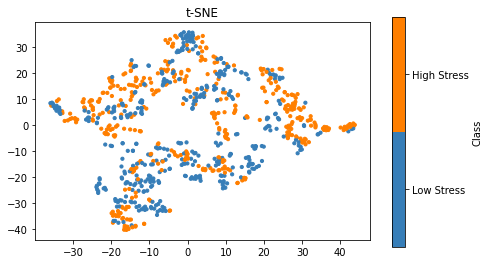

In [24]:
X_age_n = normalize_features(X_age, set(X_age.columns) - {'Sex'}, 'median')
X_age_n['Sex'] = X_age['Sex']
y_age_numeric = np.array([0 if label == 'low stress' else 1 for label in y_age])
X_age_tsne = tsne(X_age_n, y_age_numeric,'t-SNE', ['Low Stress', 'High Stress'] )

In [25]:
X_young_tsne = X_age_tsne[len(X_old_bal):,:]
y_young_numeric = y_age_numeric[len(X_old_bal):]
X_old_tsne = X_age_tsne[:len(X_old_bal),:]
y_old_numeric = y_age_numeric[:len(X_old_bal)]

<ipython-input-13-ebb389016f04>:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,0.93,0.9])


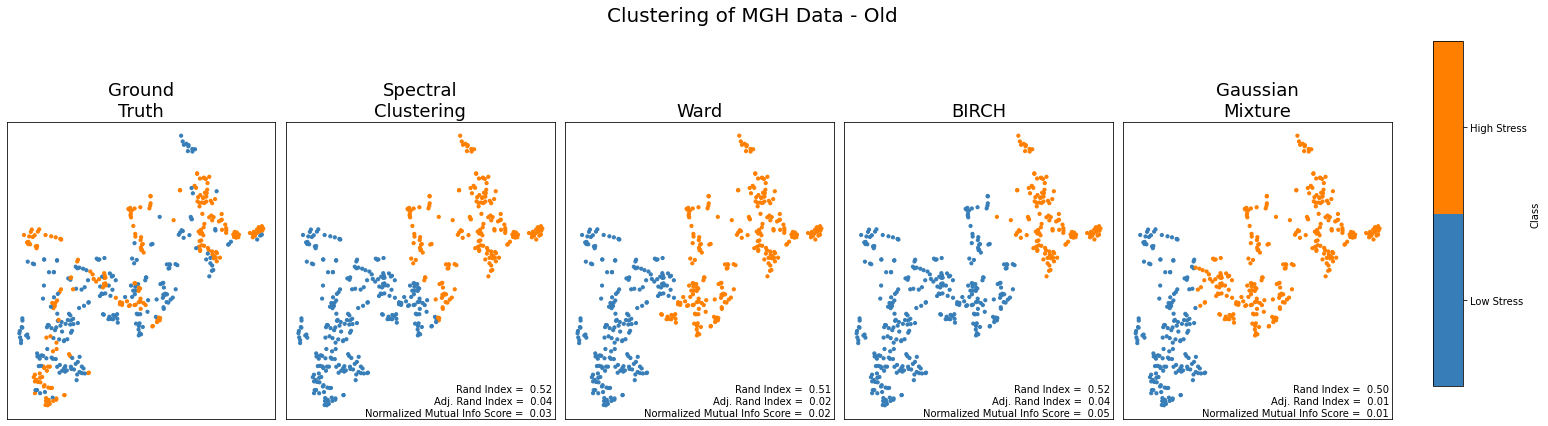

In [26]:
default_base = {'n_neighbors': 10,
                'n_clusters': 2,
                'min_samples': 20,
                'affinity': 'rbf',
                'gamma': 0.0001,
                'xi': 0.05,
                'min_cluster_size': 0.1}

plot_clustering_results(X_old_tsne,y_old_numeric,default_base, 'Clustering of MGH Data - Old', ['Low Stress', 'High Stress'])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:245: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
<ipython-input-13-ebb389016f04>:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,0.93,0.9])


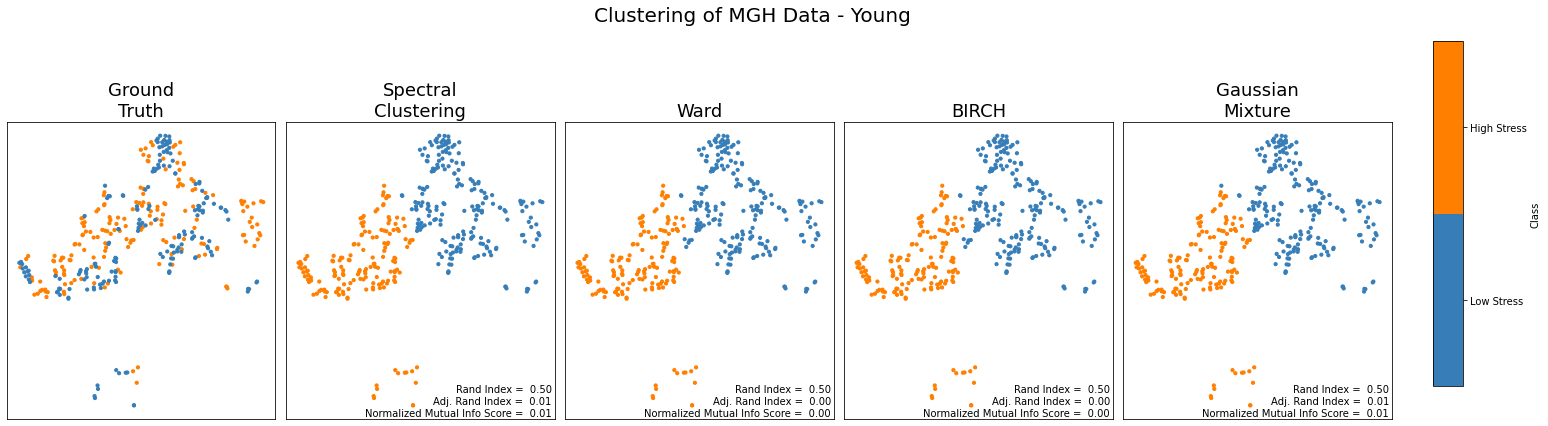

In [27]:
plot_clustering_results(X_young_tsne,y_young_numeric,default_base, 'Clustering of MGH Data - Young', ['Low Stress', 'High Stress'])

# BMI

In [28]:
normal = mgh_filtered[mgh_filtered['BMI Group']=='Normal'].drop(['Age Group','BMI Group'], axis=1)
overweight = mgh_filtered[mgh_filtered['BMI Group']=='Overweight'].drop(['Age Group','BMI Group'], axis=1)
obese = mgh_filtered[mgh_filtered['BMI Group']=='Obese'].drop(['Age Group','BMI Group'], axis=1)

In [29]:
X_normal_bal, y_normal_bal = rebalance(normal.iloc[:,:-1], normal.iloc[:,-1])
X_overwgt_bal, y_overwgt_bal = rebalance(overweight.iloc[:,:-1], overweight.iloc[:,-1])
X_obese_bal, y_obese_bal = rebalance(obese.iloc[:,:-1], obese.iloc[:,-1])

Distribution of positive and negative classes before balancing (%):
high stress    202
low stress     137
Name: Stress Class, dtype: int64

Balance of positive and negative classes (%):
low stress     202
high stress    202
Name: Stress Class, dtype: int64



Distribution of positive and negative classes before balancing (%):
high stress    195
low stress      78
Name: Stress Class, dtype: int64

Balance of positive and negative classes (%):
high stress    156
low stress     156
Name: Stress Class, dtype: int64



Distribution of positive and negative classes before balancing (%):
low stress     217
high stress     51
Name: Stress Class, dtype: int64

Balance of positive and negative classes (%):
high stress    102
low stress     102
Name: Stress Class, dtype: int64





In [30]:
X_BMI = pd.concat([X_normal_bal,X_overwgt_bal,X_obese_bal])
y_BMI = pd.concat([y_normal_bal,y_overwgt_bal,y_obese_bal])

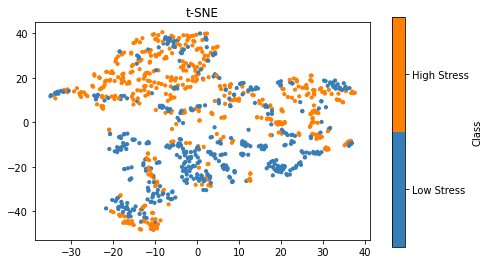

In [31]:
X_BMI_n = normalize_features(X_BMI, set(X_BMI.columns) - {'Sex'}, 'median')
X_BMI_n['Sex'] = X_BMI['Sex']
y_BMI_numeric = np.array([0 if label == 'low stress' else 1 for label in y_BMI])
X_BMI_tsne = tsne(X_BMI_n, y_BMI_numeric,'t-SNE', ['Low Stress', 'High Stress'] )

In [32]:
X_normal_tsne = X_BMI_tsne[:len(X_normal_bal),:]
y_normal_tsne = y_BMI_numeric[:len(X_normal_bal)]
X_overweight_tsne = X_BMI_tsne[len(X_normal_bal):len(X_normal_bal)+len(X_overwgt_bal),:]
y_overweight_tsne = y_BMI_numeric[len(X_normal_bal):len(X_normal_bal)+len(X_overwgt_bal)]
X_obese_tsne = X_BMI_tsne[len(X_normal_bal)+len(X_overwgt_bal):,:]
y_obese_tsne = y_BMI_numeric[len(X_normal_bal)+len(X_overwgt_bal):]

<ipython-input-13-ebb389016f04>:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,0.93,0.9])


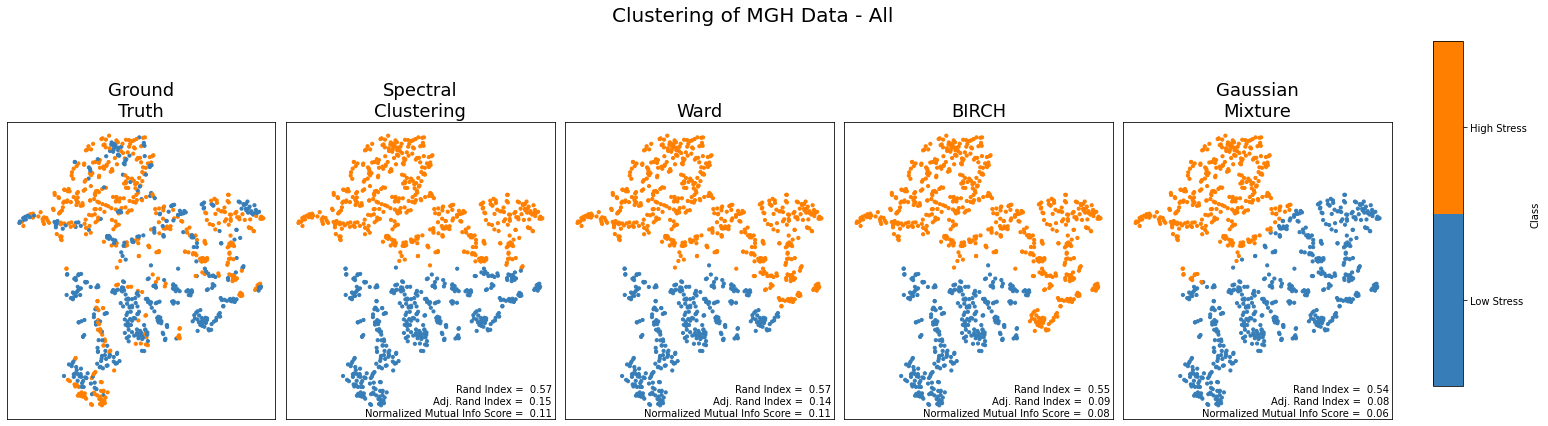

In [33]:
plot_clustering_results(X_BMI_tsne,y_BMI_numeric,default_base, 'Clustering of MGH Data - All', ['Low Stress', 'High Stress'])

,features,coeff,abs coeff,norm. abs coeff
3,80th,70.676041,70.676041,1.964538
2,mean,47.892808,47.892808,1.028019
4,20th,36.138021,36.138021,0.544831
5,Age,16.000000,16.000000,-0.282955
1,sdnn,7.828622,7.828622,-0.618845
7,BMI,3.284661,3.284661,-0.805627
6,Sex,1.000000,1.000000,-0.899540
0,hf,-0.248706,0.248706,-0.930422


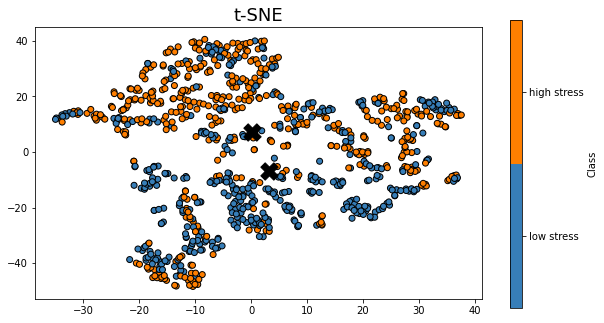

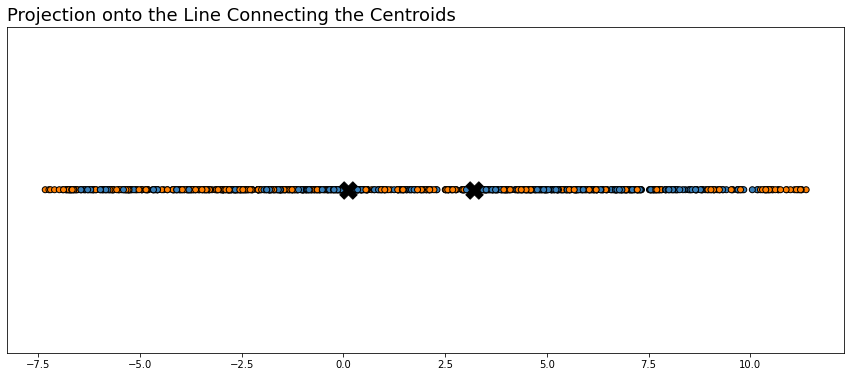

In [34]:
find_centroids_(X_BMI.to_numpy(), X_BMI_tsne, y_BMI_numeric, None, None, X_BMI.columns)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:245: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
<ipython-input-13-ebb389016f04>:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,0.93,0.9])


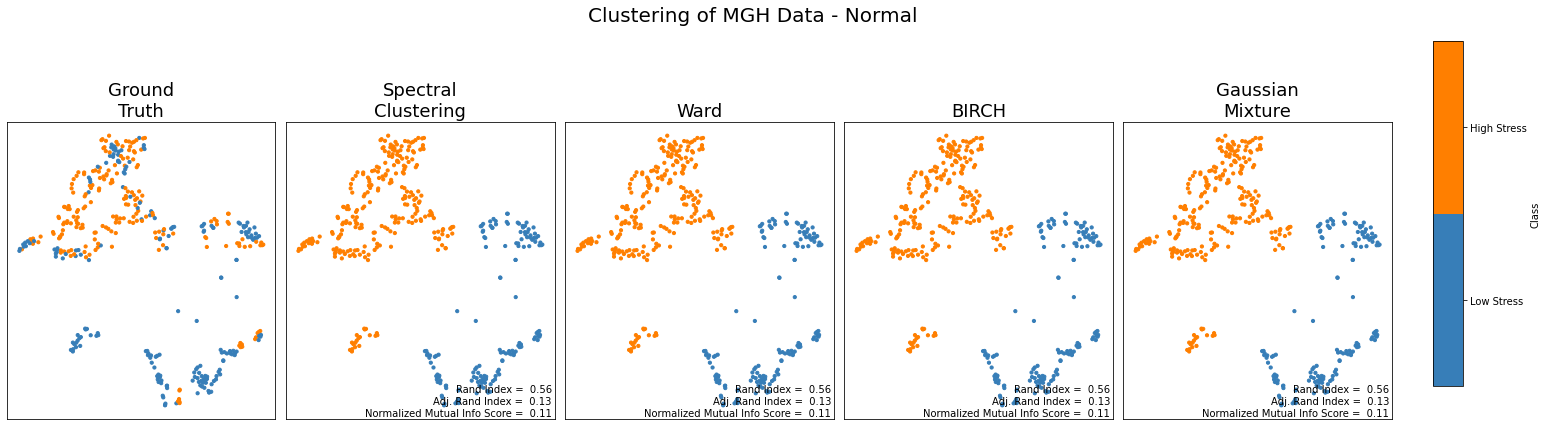

In [35]:
plot_clustering_results(X_normal_tsne,y_normal_tsne,default_base, 'Clustering of MGH Data - Normal', ['Low Stress', 'High Stress'])

,features,coeff,abs coeff,norm. abs coeff
3,80th,51.000000,51.000000,1.923958
5,Age,35.000000,35.000000,1.015300
2,mean,22.736074,22.736074,0.318817
1,sdnn,21.364996,21.364996,0.240952
4,20th,5.000000,5.000000,-0.688435
6,Sex,-1.000000,1.000000,-0.915599
7,BMI,-0.553700,0.553700,-0.940945
0,hf,0.322970,0.322970,-0.954048


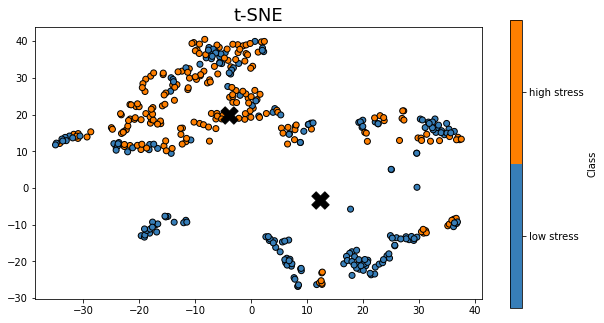

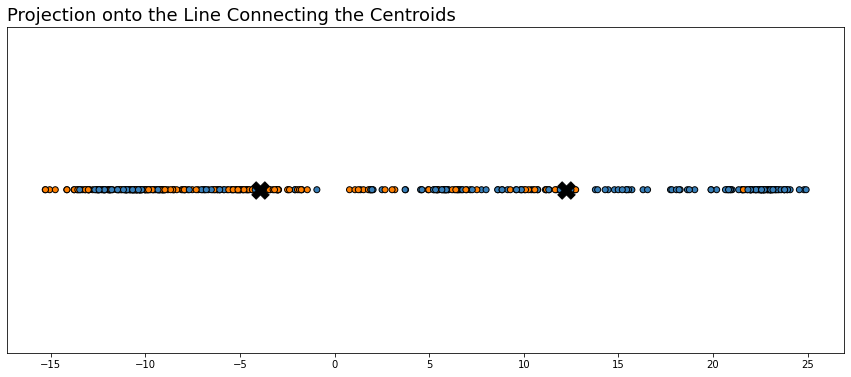

In [36]:
find_centroids_(X_normal_bal.to_numpy(), X_normal_tsne, y_normal_tsne, None, None, X_BMI.columns)

<ipython-input-13-ebb389016f04>:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,0.93,0.9])


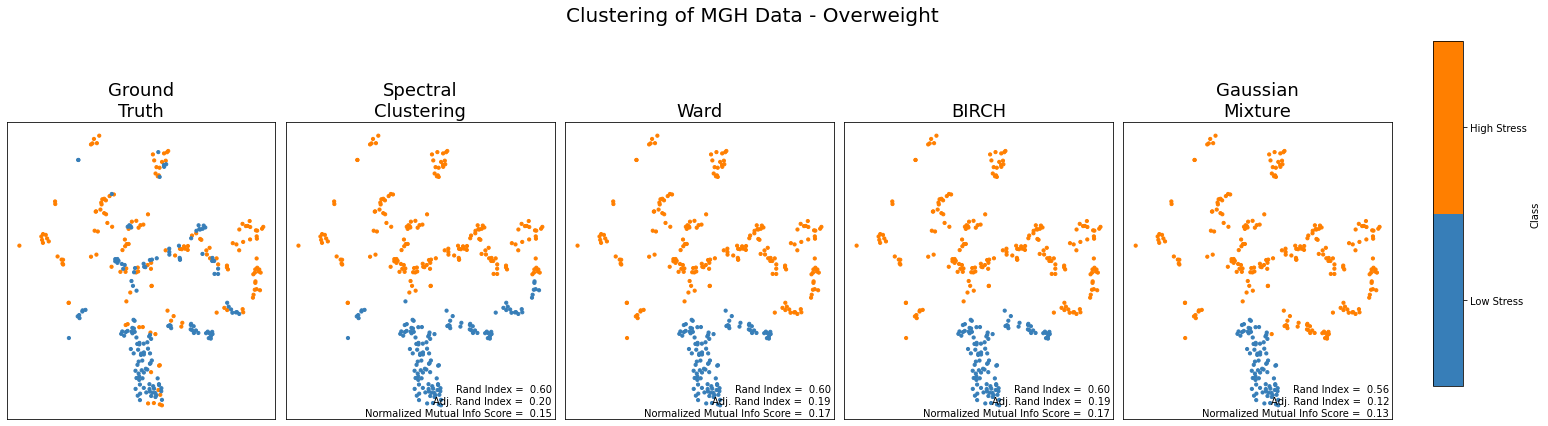

In [37]:
plot_clustering_results(X_overweight_tsne,y_overweight_tsne,default_base, 'Clustering of MGH Data - Overweight', ['Low Stress', 'High Stress'])

,features,coeff,abs coeff,norm. abs coeff
3,80th,78.000000,78.000000,2.053220
1,sdnn,47.849165,47.849165,0.876902
2,mean,34.408424,34.408424,0.352518
5,Age,23.000000,23.000000,-0.092575
4,20th,-17.800000,17.800000,-0.295451
7,BMI,1.622975,1.622975,-0.926589
0,hf,-0.302197,0.302197,-0.978118
6,Sex,0.000000,0.000000,-0.989908


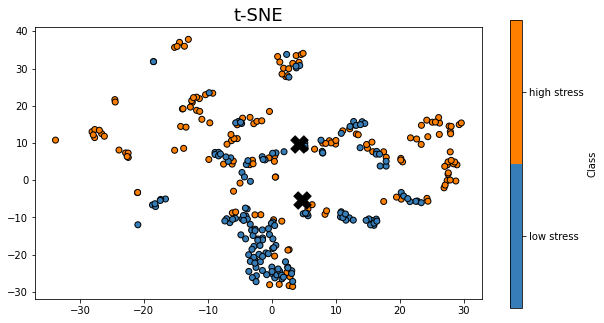

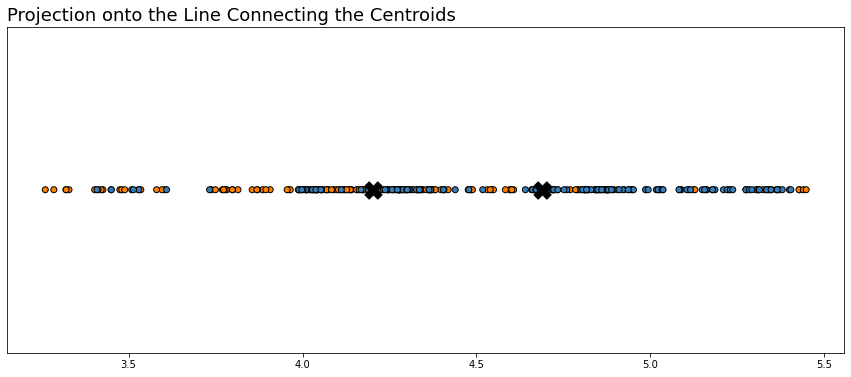

In [38]:
find_centroids_(X_overwgt_bal.to_numpy(), X_overweight_tsne, y_overweight_tsne, None, None, X_BMI.columns)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:245: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
<ipython-input-13-ebb389016f04>:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,0.93,0.9])


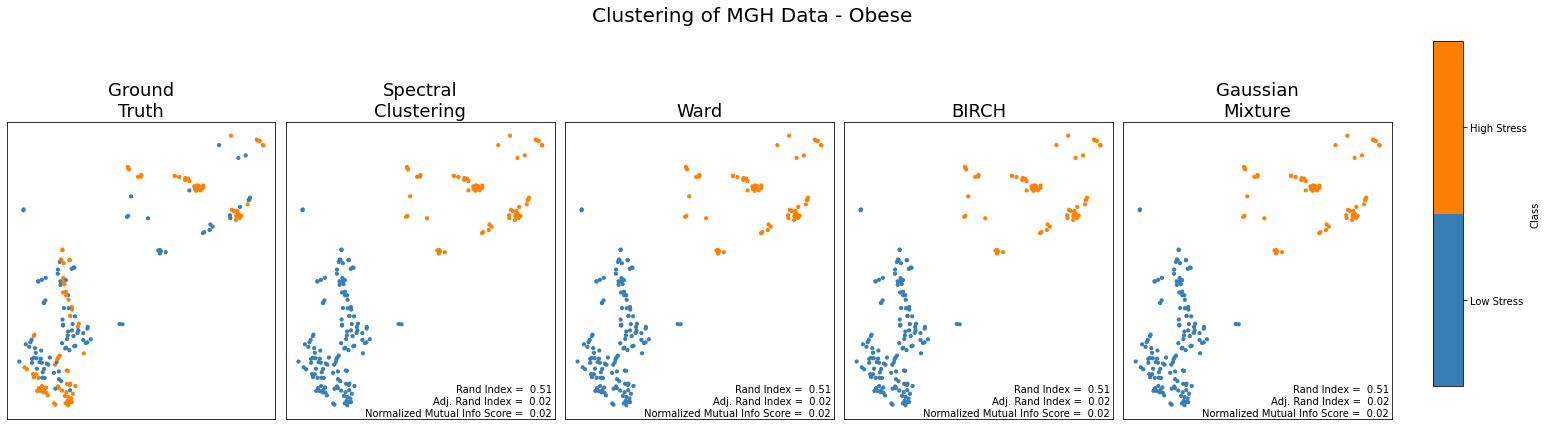

In [39]:
plot_clustering_results(X_obese_tsne,y_obese_tsne,default_base, 'Clustering of MGH Data - Obese', ['Low Stress', 'High Stress'])

,features,coeff,abs coeff,norm. abs coeff
3,80th,-46.400000,46.400000,1.301760
2,mean,-46.032609,46.032609,1.284061
4,20th,-43.800000,43.800000,1.176504
5,Age,-16.000000,16.000000,-0.162773
1,sdnn,-2.139612,2.139612,-0.830503
7,BMI,-0.520537,0.520537,-0.908503
0,hf,-0.137256,0.137256,-0.926967
6,Sex,0.000000,0.000000,-0.933580


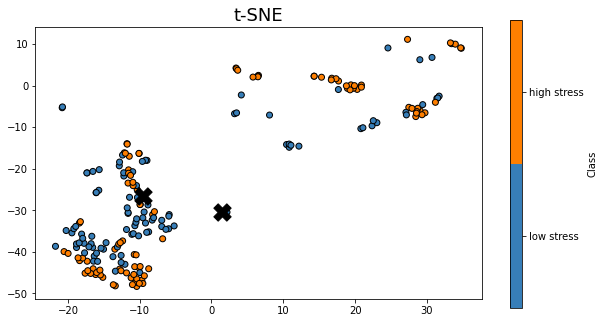

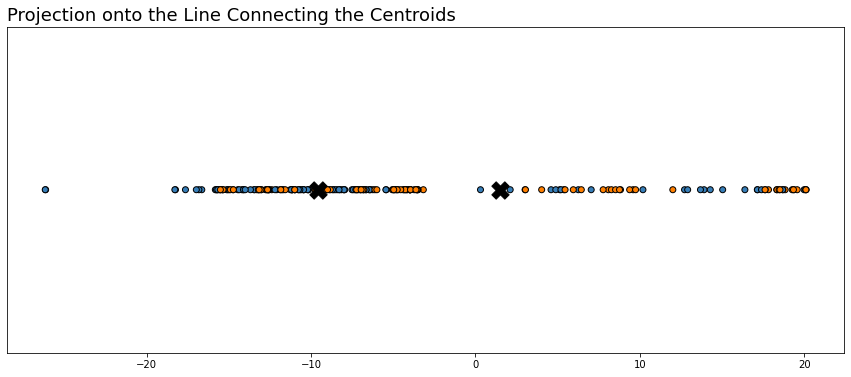

In [40]:
find_centroids_(X_obese_bal.to_numpy(), X_obese_tsne, y_obese_tsne, None, None, X_BMI.columns)